In [2]:
import pandas as pd
import numpy as np
import nltk
import wordcloud
import matplotlib.pyplot as plt
import sys
import os
from nltk.stem import WordNetLemmatizer
sys.path.append(os.path.abspath(os.path.join('..'))) # Adding racine path of project to sys.path
from src.preprocessing import *
from src.visualization import *
from nltk.corpus import stopwords, words
import warnings
from pandarallel import pandarallel
from textblob import TextBlob

warnings.filterwarnings('ignore')


In [3]:
df3 = pd.read_csv('../data/df2.csv', index_col=0, parse_dates=True)
df3.info()
df3.sample(5)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 845770 entries, 2020-06-05 14:30:54+00:00 to 2011-05-12 04:00:00+00:00
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   headline         845770 non-null  object
 1   url              845770 non-null  object
 2   publisher        845770 non-null  object
 3   stock            845770 non-null  object
 4   headline_length  845770 non-null  int64 
 5   headline_new     845768 non-null  object
dtypes: int64(1), object(5)
memory usage: 45.2+ MB


,headline,url,publisher,stock,headline_length,headline_new
date,,,,,,
2016-02-22 04:00:00+00:00,Trovagene Announces Entered Into Preferred Pro...,https://www.benzinga.com/news/16/02/6492955/tr...,Paul Quintaro,TROV,88,trovagen announc enter prefer provid deal fort...
2017-01-25 04:00:00+00:00,East West Bancorp Reports Q4 EPS $0.76 vs $0.7...,https://www.benzinga.com/news/earnings/17/01/8...,Hal Lindon,EWBC,80,east west bancorp report q4 ep 0 76 vs 0 71 es...
2015-06-18 04:00:00+00:00,"Chardan: Buy Digital Ally, It's Worth $20/Share",https://www.benzinga.com/analyst-ratings/analy...,Monica Gerson,DGLY,47,chardan buy digit alli worth 20 share
2017-06-09 04:00:00+00:00,Earnings Growth to Continue in Q2,https://www.benzinga.com/17/06/9592268/earning...,Zacks,ADBE,33,earn growth continu q2
2018-03-08 04:00:00+00:00,Sapiens Reprots Q4 Adj. EPS $0.12 vs $0.13 Est...,https://www.benzinga.com/news/earnings/18/03/1...,Hal Lindon,SPNS,76,sapien reprot q4 adj ep 0 12 vs 0 13 est sale ...


### Sentiments most occured in the headlines

In [4]:
# Polarity related to headline
if __name__ == '__main__':
   pandarallel.initialize(nb_workers=4) 
   df3['headline_new'] = df3['headline_new'].astype(str)
   df3['headline_polarity'] = df3['headline_new'].parallel_apply(get_polarity)

INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.

https://nalepae.github.io/pandarallel/troubleshooting/


In [5]:
# Sentiment feature
df3['sentiment'] = df3['headline_polarity'].parallel_apply(lambda x: 'Positive' if x > 0 
                                                  else ('Negative' if x < 0 else 'Neutral'))

In [6]:
df3.sample(5)

,headline,url,publisher,stock,headline_length,headline_new,headline_polarity,sentiment
date,,,,,,,,
2014-08-07 04:00:00+00:00,"Rubicon Technology, Inc. Reports Q2 EPS of $(0...",https://www.benzinga.com/news/earnings/14/08/4...,Eddie Staley,RBCN,100,rubicon technolog inc report q2 ep 0 39 vs 0 4...,0.0,Neutral
2013-03-08 04:00:00+00:00,German Industrial Production (MoM) 0.0% vs 0.5...,https://www.benzinga.com/news/13/03/3399329/ge...,Charles Gross,EWG,66,german industri product mom 0 0 vs 0 5 est 0 6...,0.0,Neutral
2010-11-04 04:00:00+00:00,DIRECTV Meets Zacks Estimates - Analyst Blog,https://www.benzinga.com/10/11/579919/directv-...,Zacks,DTV,44,directv meet zack estim analyst blog,0.0,Neutral
2015-03-20 04:00:00+00:00,"8-K from Theravance Shows Co., Glaxo Introduci...",https://www.benzinga.com/news/15/03/5343741/8-...,Paul Quintaro,GSK,72,8 k therav show co glaxo introduc revlar ellip...,0.0,Neutral
2013-07-29 04:00:00+00:00,Inter Parfums USA Enters Exclusive License Dea...,https://www.benzinga.com/news/13/07/3790595/in...,Paul Quintaro,IPAR,80,inter parfum usa enter exclus licens deal agen...,0.0,Neutral


In [7]:
df3['sentiment'].value_counts()

sentiment
Neutral     661833
Positive    130093
Negative     53844
Name: count, dtype: int64

Text(0.5, 1.0, 'Summary of sentiments related to headline of news')

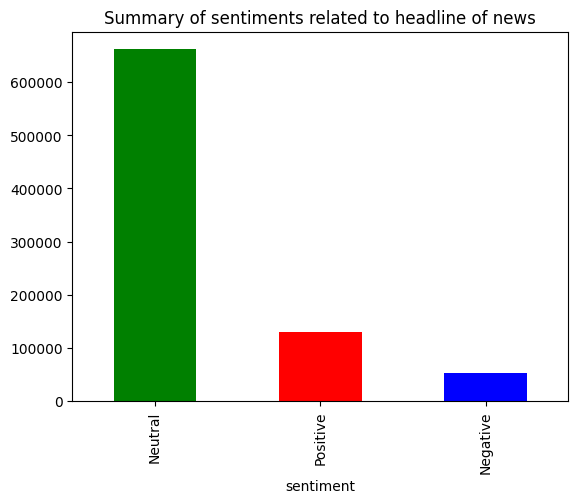

In [14]:
df3['sentiment'].value_counts().plot(kind='bar',color=['green', 'red', 'blue'])
plt.title('Summary of sentiments related to headline of news')

We note that the sentiments expressed in the newspaper headlines are much more neutral than positive. Some newspapers also express negative feelings in their headlines.